In [11]:
import os, sys
repo_dir = os.path.dirname(os.getcwd())
sys.path.insert(1, repo_dir)

In [12]:
import os
import torch
import numpy as np
from utils import show, batch_normalize
from torchvision.utils import make_grid
from autoregressive_perfect_model import PerfectARModel
from autoregressive import ARProcessPerturb3Channel
from autoregressive_params import ALL_2x2_AR_PARAMS, ALL_2x2_AR_FILTERS

### Load a set of AR coefficients

In [13]:
one_channel_coefficients = ALL_2x2_AR_PARAMS

### Create AR Perfect Model with manually-specified parameters

In [14]:
model = PerfectARModel()

### Use AR coefficients to generate a batch of perturbations

In [15]:
ar_processes = []
for key in one_channel_coefficients:
    f = one_channel_coefficients[key]
    # Here, we use the same AR process for each of the three channels
    ar = ARProcessPerturb3Channel(b=torch.tensor(np.stack([f]*3), dtype=torch.float))
    ar_processes.append(ar)

In [16]:
BATCH_SIZE = 50
random_labels = torch.randint(low=0, high=10, size=(BATCH_SIZE,))
perturbation_batch = []
for label in random_labels:
    # Choose a particular AR process (corresponding to label)
    # and generate a perturbation
    perturbation, _ = ar_processes[label].generate(size=(36,36), eps=1.0, crop=4, p=2)
    perturbation_batch.append(perturbation)
    
perturbation_batch = torch.stack(perturbation_batch)

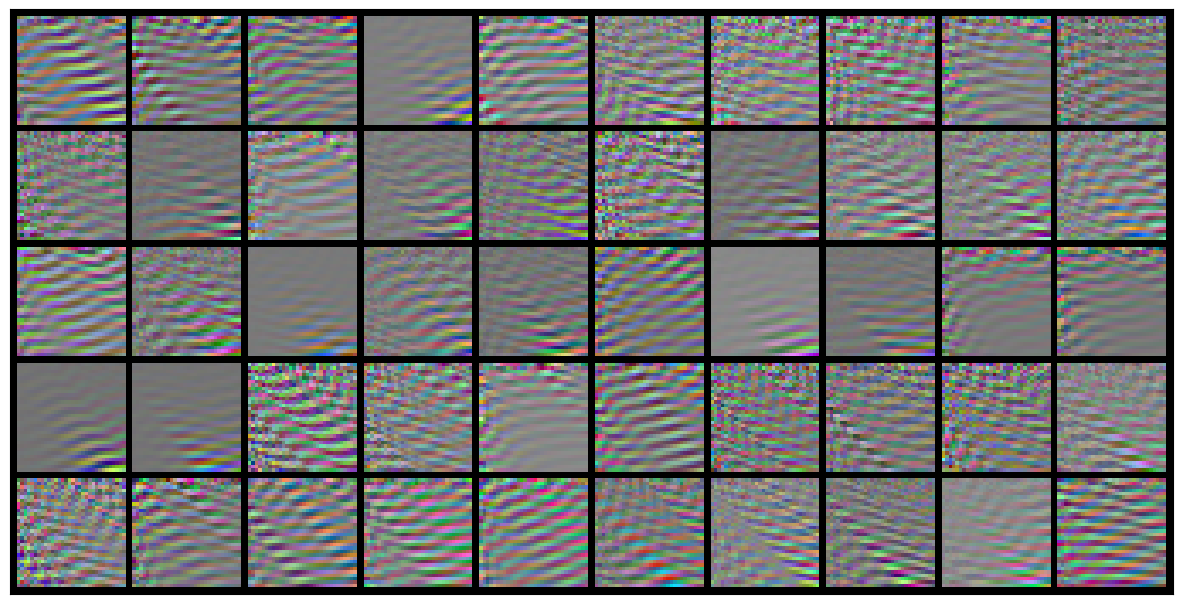

In [17]:
show(make_grid(batch_normalize(perturbation_batch), nrow=10))

### Demonstrate how the model can easily distinguish novel, generated perturbations

In [18]:
output = model(perturbation_batch)
pred = torch.argmax(output, dim=1)
# Print predictions and calculate accuracy
print(f'Predictions: {pred}')
print(f'Labels: {random_labels}')
print(f'Accuracy: {(pred == random_labels).sum().item() / perturbation_batch.size(0) * 100 : 0.2f} %')

Predictions: tensor([5, 3, 3, 7, 3, 9, 2, 2, 4, 2, 2, 8, 4, 8, 9, 1, 8, 6, 9, 6, 3, 9, 7, 9,
        8, 3, 7, 8, 0, 0, 7, 7, 1, 2, 0, 3, 1, 2, 2, 9, 1, 4, 5, 5, 3, 6, 9, 9,
        8, 5])
Labels: tensor([5, 3, 3, 7, 3, 9, 2, 2, 4, 2, 2, 8, 4, 8, 9, 1, 8, 6, 9, 6, 3, 9, 7, 9,
        8, 3, 7, 8, 0, 0, 7, 7, 1, 2, 0, 3, 1, 2, 2, 9, 1, 4, 5, 5, 3, 6, 9, 9,
        8, 5])
Accuracy:  100.00 %
